In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
df=df.iloc[:,2:]

In [77]:
df.sample(5)

,Age,EstimatedSalary,Purchased
102,32,86000,0
108,26,86000,0
123,35,53000,0
75,34,112000,1
267,37,74000,0


In [78]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

## Train test split

In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)


# StandardScaler

In [80]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(xtrain)

xtrain_scaled = scale.transform(xtrain)
xtest_scaled = scale.transform(xtest)

In [81]:
# saclar mean
scale.mean_

array([3.75107143e+01, 7.10750000e+04])

In [82]:
xtrain

,Age,EstimatedSalary
234,38,112000
45,23,20000
171,34,115000
47,27,54000
265,42,108000
...,...,...
343,47,51000
359,42,54000
323,48,30000
280,59,88000


In [83]:
xtrain_scaled

array([[ 4.68359482e-02,  1.14942217e+00],
       [-1.38901064e+00, -1.43449573e+00],
       [-3.36056475e-01,  1.23368037e+00],
       [-1.00611821e+00, -4.79569545e-01],
       [ 4.29728371e-01,  1.03707792e+00],
       [-5.27502686e-01,  8.12389405e-01],
       [ 1.09979011e+00, -9.85118699e-01],
       [-1.44610263e-01,  1.10237802e-01],
       [-5.27502686e-01,  1.28985249e+00],
       [-1.10184132e+00,  2.78754186e-01],
       [-2.40333369e-01,  7.28131212e-01],
       [ 1.86557496e+00,  1.43028282e+00],
       [-4.88871576e-02, -3.95311353e-01],
       [-7.18948898e-01,  4.47270571e-01],
       [ 1.09979011e+00, -1.20980721e+00],
       [-2.40333369e-01, -1.37832360e+00],
       [-2.40333369e-01, -1.23789328e+00],
       [-4.88871576e-02,  1.10237802e-01],
       [-1.00611821e+00, -1.12554902e+00],
       [ 1.19551322e+00, -7.60430186e-01],
       [ 1.00406701e+00,  8.21517376e-02],
       [-1.10184132e+00,  2.50668122e-01],
       [ 8.12620794e-01, -1.37832360e+00],
       [-1.

In [84]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=xtest.columns)

In [85]:
np.round(xtrain.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.5,71075.0
std,10.5,35668.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,89250.0
max,60.0,150000.0


In [86]:
np.round(xtrain_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.2,2.2


# Effect of Scaling
#Plot before after effect of every column applied standardiazation

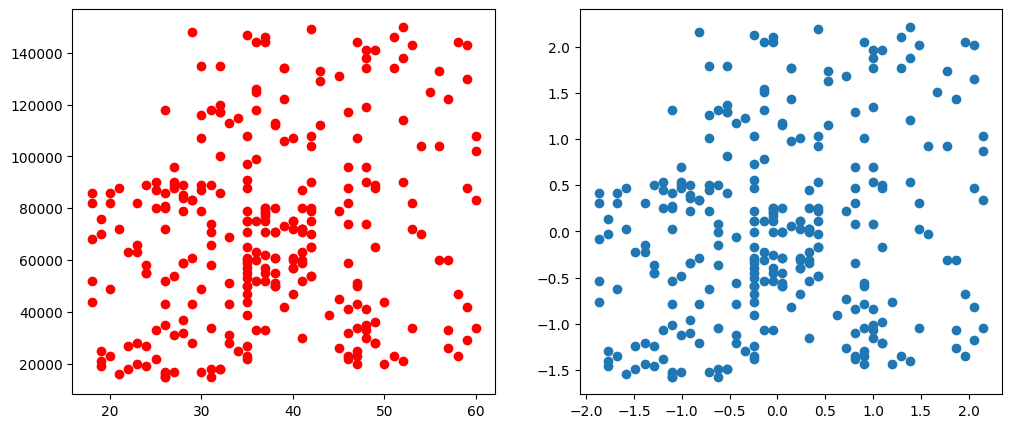

In [87]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(xtrain['Age'],xtrain['EstimatedSalary'],color = 'red')
ax2.scatter(xtrain_scaled['Age'],xtrain_scaled['EstimatedSalary'])
#Plot before after effect of every column applied standardiazation

c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rommel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

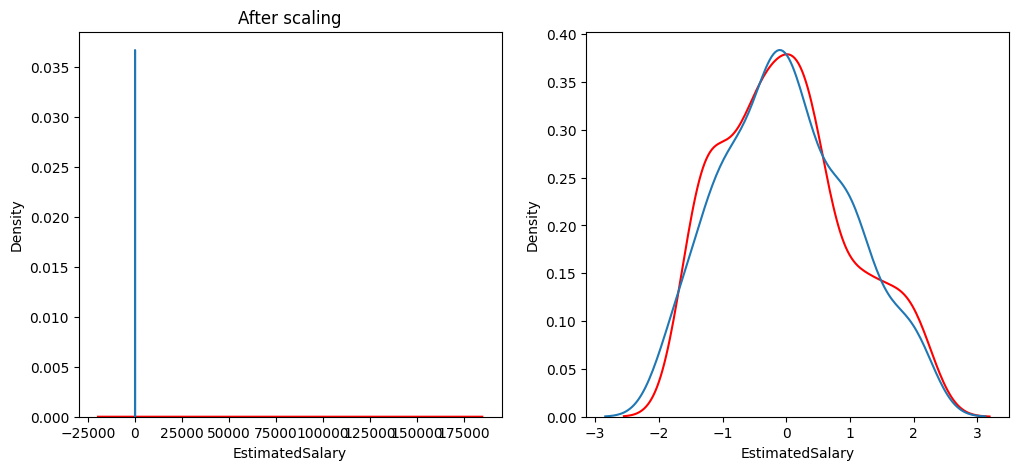

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Before scaling")
sns.kdeplot(xtrain['EstimatedSalary'],ax=ax1,color='red')
sns.kdeplot(xtrain['Age'],ax = ax1)
# after scaling
ax1.set_title("After scaling")
sns.kdeplot(xtrain_scaled['EstimatedSalary'],ax=ax2,color='red')
sns.kdeplot(xtrain_scaled['Age'],ax = ax2)
plt.show()

# Comparison of Distributions
Every individual columns kde plot of before after effect

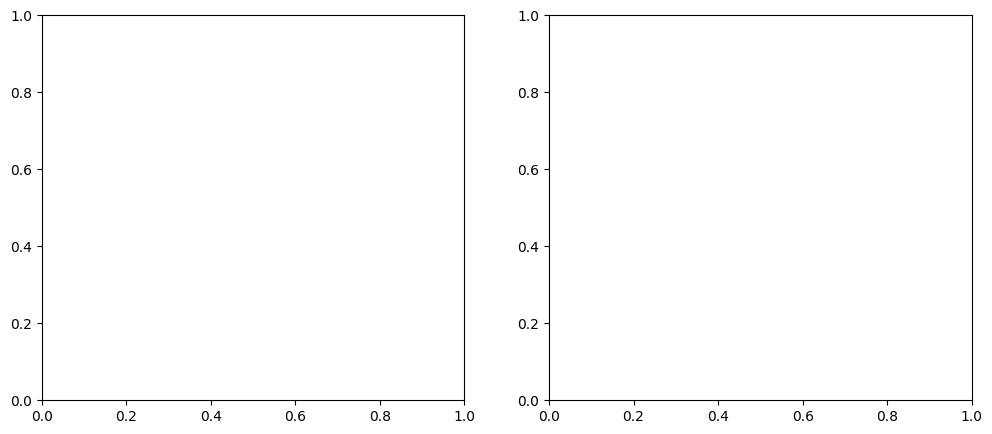

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling


# after scaling


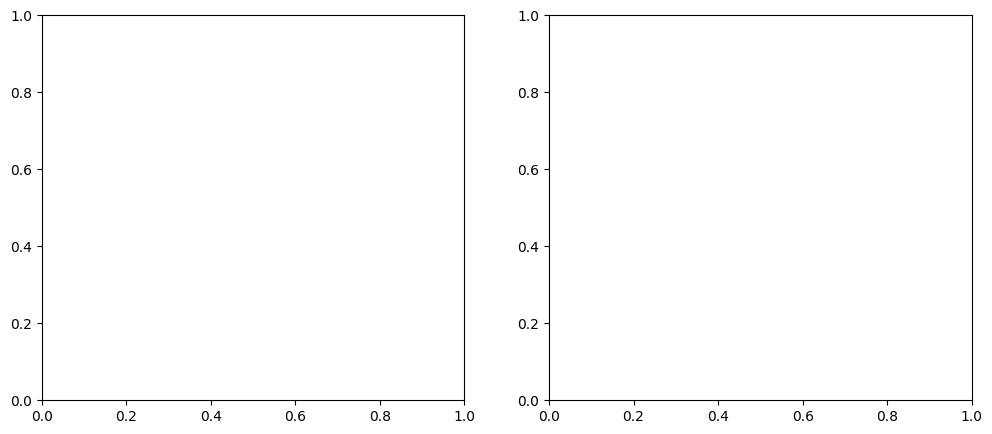

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling


# after scaling


# Why scaling is important?

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [93]:
lr.fit(xtrain,ytrain)
lr_scaled.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [94]:
y_pred = lr.predict(xtest)
y_pred_scaled = lr_scaled.predict(xtest_scaled)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
print("Actual",accuracy_score(ytest,y_pred))
print("Scaled",accuracy_score(ytest,y_pred_scaled))

Actual 0.625
Scaled 0.8416666666666667


In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [99]:
dt.fit(xtrain,ytrain)
dt_scaled.fit(xtrain_scaled,ytrain)

DecisionTreeClassifier()

In [100]:
y_pred = dt.predict(xtest)
y_pred_scaled = dt_scaled.predict(xtest_scaled)

In [101]:
print("Actual",accuracy_score(ytest,y_pred))
print("Scaled",accuracy_score(ytest,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [102]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [103]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

xtrain.shape, xtest.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(xtrain)

# transform train and test sets
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [ ]:
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=xtrain.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=xtest.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(xtrain['Age'], xtrain['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(xtrain_scaled['Age'], xtrain_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()